In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

Attribute Information:

scale (0:Not Applicable;1-5)

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service 

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Label:

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [93]:
data=pd.read_csv("Invistico_Airline.csv")

# Outliers:

In [94]:
def outliersCapping(c):
    upper_limit = data[c].mean() + 3 * data[c].std()
    lower_limit = data[c].mean() - 3 * data[c].std()

    data[c] = np.where(
        data[c] > upper_limit,
        upper_limit,
        np.where(data[c] < lower_limit, lower_limit, data[c]),
    )

In [95]:
def box(data):
    df=data.drop(['satisfaction', 'Gender', 'Customer Type','Type of Travel','Class'],axis=1)
    nonbinary_columns = [column for column in df.columns if len(df[column].unique()) > 2]

    plt.figure(figsize=(20, 20))

    for i, column in enumerate(nonbinary_columns):
        plt.subplot(3, 6, i + 1)
        sns.boxplot(data=df[column],)
        plt.title(column)

    plt.suptitle("Boxplots With Outliers", size=30)
    plt.show()

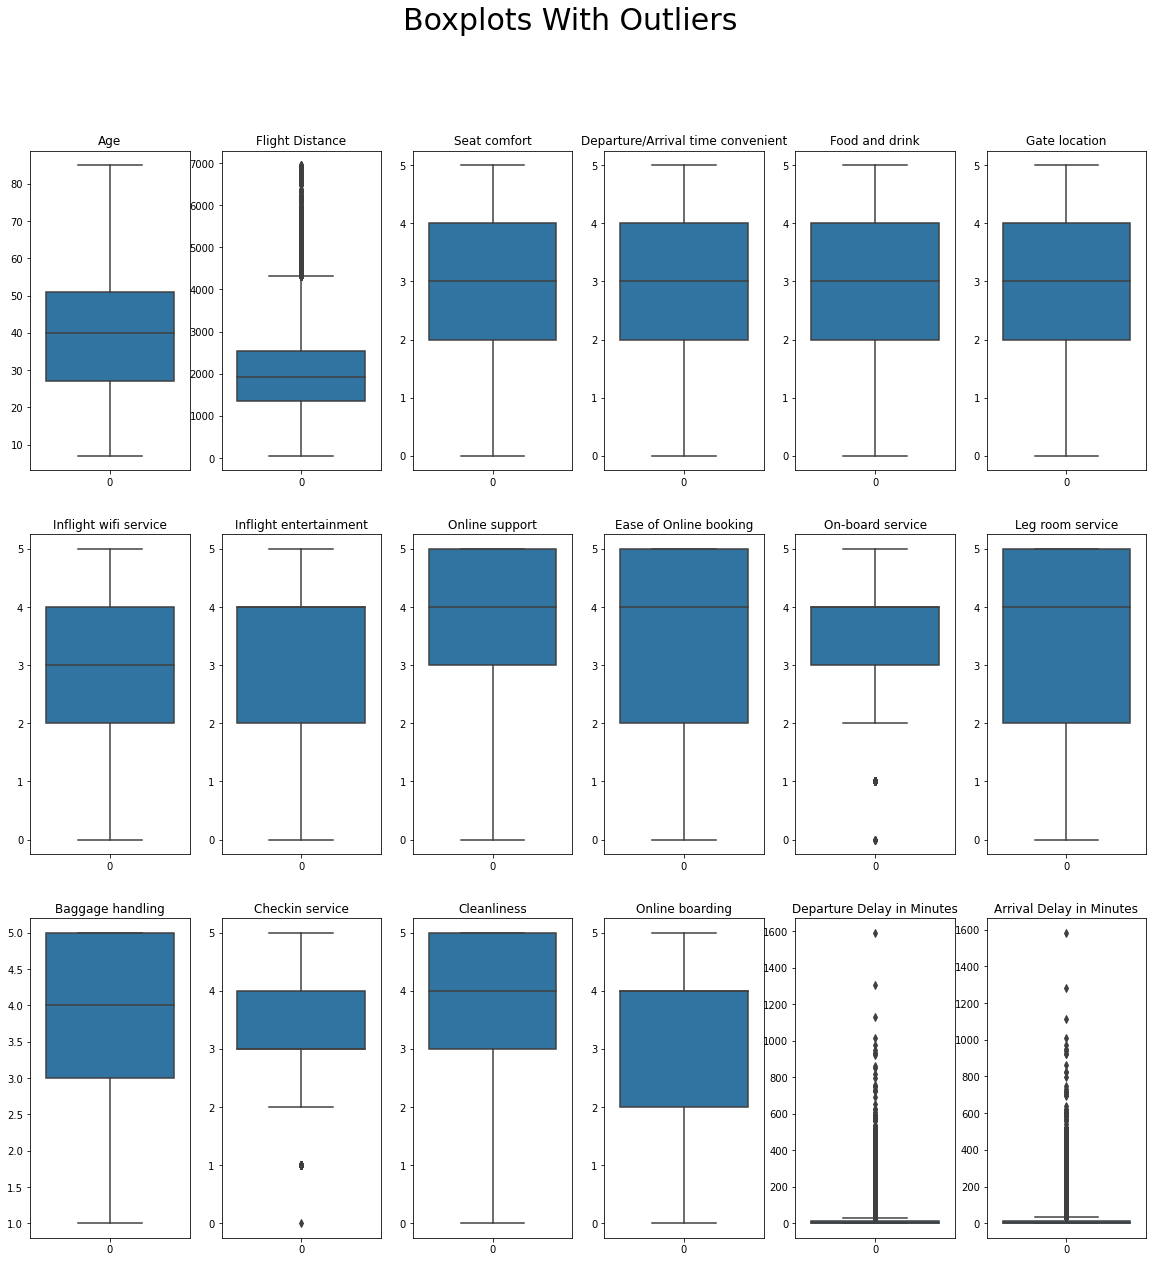

In [96]:
box(data)

In [97]:
outliersCapping('Departure Delay in Minutes')
outliersCapping('Arrival Delay in Minutes')
outliersCapping('Flight Distance')


In [98]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [99]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(),inplace=True)

# Encoding:

In [100]:
for col in data.columns:
   if data[col].dtype=='object':
       l_en=LabelEncoder()
       data[col] = l_en.fit_transform(data[col])

In [101]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265.0,0,0,0,...,2,3,3,0,3,5,3,2,0.000000,0.00000
1,1,1,0,47,1,0,2464.0,0,0,0,...,2,3,4,4,4,2,3,2,128.927091,130.48808
2,1,0,0,15,1,1,2138.0,0,0,0,...,2,2,3,3,4,4,4,2,0.000000,0.00000
3,1,0,0,60,1,1,623.0,0,0,0,...,3,1,1,0,1,4,1,3,0.000000,0.00000
4,1,0,0,70,1,1,354.0,0,0,0,...,4,2,2,0,2,4,2,5,0.000000,0.00000


# Modeling

In [187]:
x = data.drop(["satisfaction"], axis=1)
y = data["satisfaction"]

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =100 ,stratify=y)

In [190]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('XGB', XGBClassifier()),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)),
    ('KNeighborsClassifier',KNeighborsClassifier())

   
    
]

results = dict()
for name, model in models:
    
    clf=make_pipeline(StandardScaler(), model)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    
    
    print(name)

    print(clf.score(x_train, y_train))
    print(clf.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    # skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)


Logistic Regression
0.8360698336926393
0.8342700954727441
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11759
           1       0.85      0.85      0.85     14217

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976

Decision Tree
1.0
0.9408299969202341
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11759
           1       0.94      0.95      0.95     14217

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Random Forest Classifier
1.0
0.9586541422851863
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11759
           1       0.97      0.96      0.96     14217

    accuracy                           

In [105]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("XGB", XGBClassifier()),
    (
        "CatBoostClassifier",
        CatBoostClassifier(max_depth=10, iterations=10, learning_rate=0.4),
    ),
    ("KNeighborsClassifier", KNeighborsClassifier()),
]

results = dict()
for name, model in models:

    clf = make_pipeline(RobustScaler(), model)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    print(name)

    print(clf.score(x_train, y_train))
    print(clf.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    # skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)


Logistic Regression
0.836079457961195
0.8342700954727441
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11759
           1       0.85      0.85      0.85     14217

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976

Decision Tree
1.0
0.9414459501077919
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11759
           1       0.95      0.95      0.95     14217

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Random Forest Classifier
0.9999903757314444
0.9598860486603018
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11759
           1       0.97      0.96      0.96     14217

    accuracy             

In [106]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('XGB', XGBClassifier()),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)),
    ('KNeighborsClassifier',KNeighborsClassifier())

   
    
]

results = dict()
for name, model in models:
    
    clf=make_pipeline(MinMaxScaler(), model)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    
    
    print(name)

    print(clf.score(x_train, y_train))
    print(clf.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    # skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)


Logistic Regression
0.8360698336926393
0.834154604250077
              precision    recall  f1-score   support

           0       0.81      0.82      0.82     11759
           1       0.85      0.85      0.85     14217

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976

Decision Tree
1.0
0.9422543886664614
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11759
           1       0.95      0.95      0.95     14217

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Random Forest Classifier
0.9999903757314444
0.9593855866954112
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11759
           1       0.97      0.96      0.96     14217

    accuracy             

# GridSearch

In [174]:
x = data.drop(["satisfaction"], axis=1)[:1000]
y = data["satisfaction"][:1000]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =100 ,stratify=y)

In [179]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [180]:
params = {
    "gamma": [0.5, 1, 1.5, 2, 5],
    "max_depth": [3, 4, 5],
    "n_estimators": range(60, 220, 40),
    "learning_rate": [0.1, 0.01, 0.05],
}


In [181]:
grid = GridSearchCV(XGBClassifier(), param_grid=params, cv=2, refit=True)

In [182]:
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}
1.0


In [184]:
y_predict = grid.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     100.0

    accuracy                           0.00     100.0
   macro avg       0.00      0.00      0.00     100.0
weighted avg       0.00      0.00      0.00     100.0



# Feature selection

In [107]:
x = data.drop(["satisfaction"], axis=1)
y = data["satisfaction"]

In [108]:
model = DecisionTreeClassifier()
model.fit(x, y)


DecisionTreeClassifier()

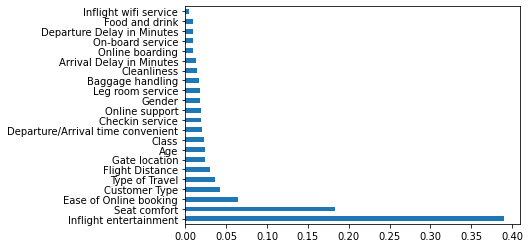

In [109]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(22).plot(kind="barh")
plt.show()

In [110]:
print(feat_importances.nlargest(22))

Inflight entertainment               0.389979
Seat comfort                         0.183201
Ease of Online booking               0.063969
Customer Type                        0.042553
Type of Travel                       0.036429
Flight Distance                      0.030412
Gate location                        0.023914
Age                                  0.023795
Class                                0.022539
Departure/Arrival time convenient    0.020851
Checkin service                      0.019759
Online support                       0.019287
Gender                               0.017991
Leg room service                     0.017745
Baggage handling                     0.016674
Cleanliness                          0.014620
Arrival Delay in Minutes             0.013098
Online boarding                      0.010029
On-board service                     0.010004
Departure Delay in Minutes           0.009480
Food and drink                       0.009076
Inflight wifi service             

In [111]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [112]:
unimportant = [
    "Cleanliness",
    "Departure/Arrival time convenient", "Gate location",
    "Age",
    "Flight Distance",
    "Inflight wifi service",
    "Arrival Delay in Minutes",
    "Departure Delay in Minutes",
]


# Modeling

In [113]:
d=data.drop(unimportant,axis=1)

In [114]:
x = d.drop(["satisfaction"], axis=1)
y = d["satisfaction"]

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =100 ,stratify=y)

In [116]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('XGB', XGBClassifier()),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)),
    ('KNeighborsClassifier',KNeighborsClassifier())

   
    
]

results = dict()
for name, model in models:
    
    clf=make_pipeline(StandardScaler(), model)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    
    
    print(name)

    print(clf.score(x_train, y_train))
    print(clf.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    # skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)


Logistic Regression
0.8307379889128427
0.829111487526948
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     11759
           1       0.85      0.84      0.84     14217

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976

Decision Tree
0.9888069756698491
0.9320911610717586
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     11759
           1       0.94      0.93      0.94     14217

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Random Forest Classifier
0.9888069756698491
0.9450261780104712
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11759
           1       0.95      0.95      0.95     14217

    accura

In [117]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('XGB', XGBClassifier()),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)),
    ('KNeighborsClassifier',KNeighborsClassifier())

   
    
]

results = dict()
for name, model in models:
    
    clf=make_pipeline(RobustScaler(), model)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    
    
    print(name)

    print(clf.score(x_train, y_train))
    print(clf.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    # skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)


Logistic Regression
0.8306994918386202
0.829111487526948
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     11759
           1       0.85      0.84      0.84     14217

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976

Decision Tree
0.9888069756698491
0.9315137049584231
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     11759
           1       0.94      0.93      0.94     14217

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Random Forest Classifier
0.9888069756698491
0.94467970434247
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11759
           1       0.95      0.95      0.95     14217

    accuracy

In [118]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('XGB', XGBClassifier()),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)),
    ('KNeighborsClassifier',KNeighborsClassifier())

   
    
]

results = dict()
for name, model in models:
    
    clf=make_pipeline(MinMaxScaler(), model)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    
    
    print(name)

    print(clf.score(x_train, y_train))
    print(clf.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    # skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)


Logistic Regression
0.8307091161071759
0.8290344933785032
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     11759
           1       0.85      0.84      0.84     14217

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976

Decision Tree
0.9888069756698491
0.931398213735756
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     11759
           1       0.94      0.93      0.94     14217

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Random Forest Classifier
0.9888069756698491
0.9451031721589159
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11759
           1       0.95      0.95      0.95     14217

    accura

# Cross validation

In [119]:
sk_folds = StratifiedKFold(n_splits = 5)
clf=make_pipeline(StandardScaler(), XGBClassifier())
scores = cross_val_score(clf, x, y, cv = sk_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.78176009 0.60274869 0.80104712 0.79107638 0.64671235]
Average CV Score:  0.7246689251616878
Number of CV Scores used in Average:  5
